In [2]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
import statsmodels
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.stattools import arma_order_select_ic
from statsmodels.tsa.arima.model import ARIMA

In [31]:
def read_txt(txt:str = "m-GLBTs.txt"):
    with open(txt, mode = "r") as file:
        txt = file.read().split()
    return np.asarray([float(i) for i in txt])

In [32]:
ts = read_txt()

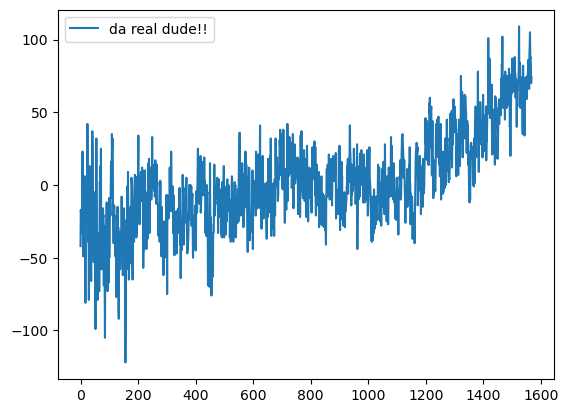

In [33]:
plt.plot(ts, label= "da real dude!!")
plt.legend(
)
plt.show()

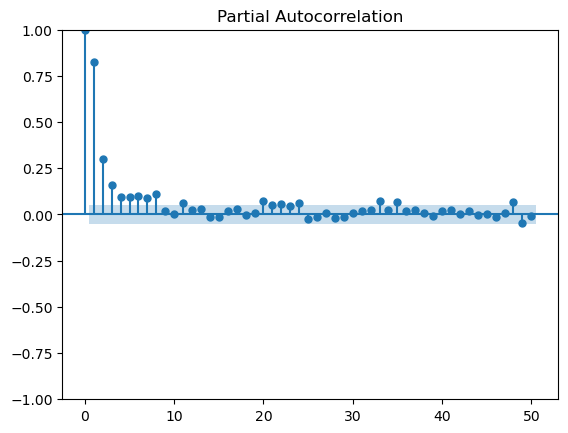

In [41]:
plot_pacf(ts, lags = 50);

In [45]:
adfuller(pd.Series(ts).diff(1)[1:])

(-13.445367959136654,
 3.77419869477823e-25,
 22,
 1544,
 {'1%': -3.4345923608042512,
  '5%': -2.8634137428910185,
  '10%': -2.567767551360439},
 13010.520462456549)

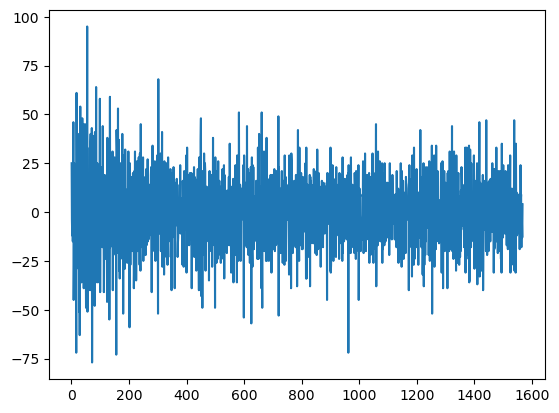

In [47]:
diff_ts = pd.Series(ts).diff(1)[1:]
plt.plot(diff_ts) ##Yes looks like this is an arma process

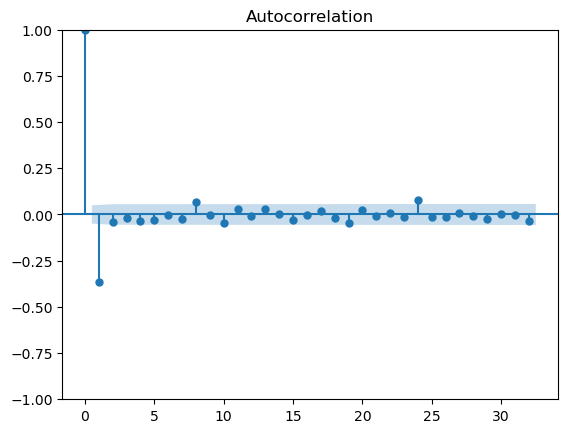

In [49]:
plot_acf(diff_ts);

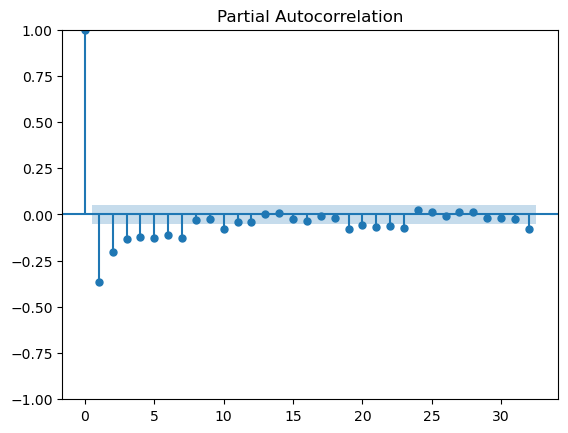

In [50]:
plot_pacf(diff_ts);

In [55]:
mod = arma_order_select_ic(diff_ts, max_ar = 4, max_ma = 2, ic = ["bic", "aic"])

c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [57]:
mod ##ARIMA(1,1,2)

{'bic':               0             1             2
 0  13692.092040  13350.046165  13312.832964
 1  13476.987263  13289.294495  13265.561266
 2  13419.959042  13271.371615  13271.367396
 3  13400.522246  13273.901507  13277.138424
 4  13383.688535  13280.965069  13288.342645,
 'aic':               0             1             2
 0  13681.378203  13333.975410  13291.405291
 1  13460.916509  13267.866822  13238.776674
 2  13398.531369  13244.587024  13239.225887
 3  13373.737655  13241.759998  13239.639997
 4  13351.547025  13243.466641  13245.487299,
 'bic_min_order': (1, 2),
 'aic_min_order': (1, 2)}

In [61]:
mod = ARIMA(ts, order = (2,1,2))
model = mod.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1568
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -6616.101
Date:                Thu, 23 May 2024   AIC                          13242.202
Time:                        18:25:33   BIC                          13268.986
Sample:                             0   HQIC                         13252.158
                               - 1568                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9796      0.110      8.918      0.000       0.764       1.195
ar.L2         -0.1315      0.064     -2.049      0.040      -0.257      -0.006
ma.L1         -1.5332      0.105    -14.642      0.000      -1.738      -1.328
ma.L2          0.5447      0.100      5.431      0.000       0.348       0.741
sigma2       271.9386      7.761     35.040      0.000     256.728     287.149
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):               124.15
Prob(Q):                              0.83   Prob(JB):                         0.00
Heteroskedasticity (H):               0.52   Skew:                            -0.20
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.32
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

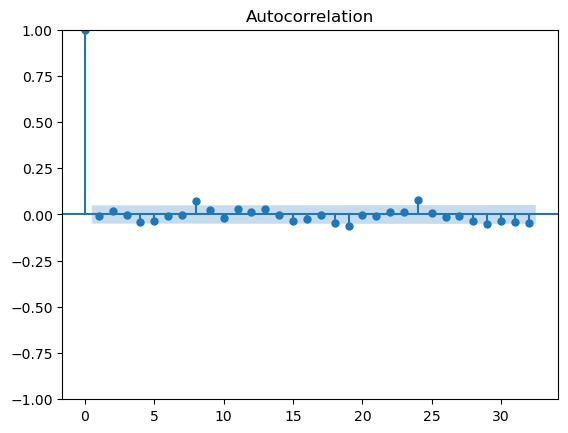

In [74]:
plot_acf(model.resid);

In [76]:
acf_ = statsmodels.tsa.stattools.acf(model.resid)

In [79]:
acf_

array([ 1.        , -0.00788165,  0.01854727, -0.00481937, -0.03856602,
       -0.03470271, -0.00890573, -0.00536061,  0.07543344,  0.02201203,
       -0.02160704,  0.02856576,  0.01202719,  0.02975787, -0.00288943,
       -0.03796376, -0.02193895, -0.0033382 , -0.04845864, -0.06370069,
       -0.00406156, -0.00834042,  0.0136568 ,  0.01333829,  0.07855218,
        0.00652917, -0.01604218, -0.00797522, -0.03504481, -0.04965889,
       -0.03594093, -0.03916629])

In [81]:
acorr_ljungbox(model.resid, lags = 40)

,lb_stat,lb_pvalue
1,0.097591,0.754740
2,0.638363,0.726744
3,0.674898,0.879092
4,3.015991,0.555153
5,4.912756,0.426620
6,5.037754,0.538980
7,5.083072,0.649826
8,14.062505,0.080151
9,14.827607,0.095781
10,15.565289,0.112771


In [115]:
mod = ARIMA(ts, order = (25,1,2), trend = "t")
model = mod.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1568
Model:                ARIMA(25, 1, 2)   Log Likelihood               -6603.538
Date:                Thu, 23 May 2024   AIC                          13265.076
Time:                        18:48:56   BIC                          13420.426
Sample:                             0   HQIC                         13322.823
                               - 1568                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0664      0.082      0.807      0.419      -0.095       0.228
ar.L1         -0.1928     45.897     -0.004      0.997     -90.150      89.765
ar.L2         -0.2313     10.574     -0.022      0.983     -20.957      20.494
ar.L3         -0.2073     10.179     -0.020      0.984     -20.157      19.743
ar.L4         -0.2136      9.433     -0.023      0.982     -18.701      18.274
ar.L5         -0.1985      9.818     -0.020      0.984     -19.442      19.045
ar.L6         -0.1644      9.192     -0.018      0.986     -18.181      17.852
ar.L7         -0.1438      7.616     -0.019      0.985     -15.071      14.783
ar.L8         -0.0568      6.627     -0.009      0.993     -13.046      12.933
ar.L9         -0.0924      2.634     -0.035      0.972      -5.255       5.070
ar.L10        -0.1193      4.147     -0.029      0.977      -8.247       8.008
ar.L11        -0.0673      5.520     -0.012      0.990     -10.887      10.752
ar.L12        -0.0708      3.184     -0.022      0.982      -6.310       6.169
ar.L13        -0.0432      3.233     -0.013      0.989      -6.379       6.293
ar.L14        -0.0675      2.003     -0.034      0.973      -3.993       3.858
ar.L15        -0.0995      3.082     -0.032      0.974      -6.141       5.942
ar.L16        -0.0915      4.615     -0.020      0.984      -9.136       8.953
ar.L17        -0.0701      4.293     -0.016      0.987      -8.485       8.344
ar.L18        -0.1022      3.266     -0.031      0.975      -6.504       6.300
ar.L19        -0.1264      4.699     -0.027      0.979      -9.336       9.084
ar.L20        -0.0738      5.875     -0.013      0.990     -11.589      11.442
ar.L21        -0.0764      3.485     -0.022      0.983      -6.906       6.753
ar.L22        -0.0505      3.486     -0.014      0.988      -6.883       6.782
ar.L23        -0.0311      2.333     -0.013      0.989      -4.604       4.542
ar.L24         0.0480      1.408      0.034      0.973      -2.713       2.809
ar.L25        -0.0028      2.233     -0.001      0.999      -4.379       4.374
ma.L1         -0.3620     45.896     -0.008      0.994     -90.316      89.592
ma.L2          0.0302     14.945      0.002      0.998     -29.262      29.322
sigma2       267.6050      8.197     32.647      0.000     251.539     283.671
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                87.66
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.53   Skew:                            -0.14
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.12
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [125]:
L = [1,8,24]
mod = ARIMA(ts, order = (25,1,2), enforce_stationarity=False, trend = "t")
with mod.fix_params({f"ar.L{i}":0 for i in range(1,24) if i not in L}):
    model = mod.fit()

In [126]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1568
Model:                ARIMA(25, 1, 2)   Log Likelihood               -6479.888
Date:                Thu, 23 May 2024   AIC                          12975.775
Time:                        18:51:23   BIC                          13018.502
Sample:                             0   HQIC                         12991.671
                               - 1568                                         
Covariance Type:                  opg                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
x1                 0.0713      0.026      2.736      0.006       0.020       0.122
ar.L1              0.7433      0.028     26.308      0.000       0.688       0.799
ar.L2 (fixed)           0        nan        nan        nan         nan         nan
ar.L3 (fixed)           0        nan        nan        nan         nan         nan
ar.L4 (fixed)           0        nan        nan        nan         nan         nan
ar.L5 (fixed)           0        nan        nan        nan         nan         nan
ar.L6 (fixed)           0        nan        nan        nan         nan         nan
ar.L7 (fixed)           0        nan        nan        nan         nan         nan
ar.L8              0.0537      0.017      3.089      0.002       0.020       0.088
ar.L9 (fixed)           0        nan        nan        nan         nan         nan
ar.L10 (fixed)          0        nan        nan        nan         nan         nan
ar.L11 (fixed)          0        nan        nan        nan         nan         nan
ar.L12 (fixed)          0        nan        nan        nan         nan         nan
ar.L13 (fixed)          0        nan        nan        nan         nan         nan
ar.L14 (fixed)          0        nan        nan        nan         nan         nan
ar.L15 (fixed)          0        nan        nan        nan         nan         nan
ar.L16 (fixed)          0        nan        nan        nan         nan         nan
ar.L17 (fixed)          0        nan        nan        nan         nan         nan
ar.L18 (fixed)          0        nan        nan        nan         nan         nan
ar.L19 (fixed)          0        nan        nan        nan         nan         nan
ar.L20 (fixed)          0        nan        nan        nan         nan         nan
ar.L21 (fixed)          0        nan        nan        nan         nan         nan
ar.L22 (fixed)          0        nan        nan        nan         nan         nan
ar.L23 (fixed)          0        nan        nan        nan         nan         nan
ar.L24             0.0815      0.020      4.064      0.000       0.042       0.121
ar.L25            -0.0791      0.020     -3.912      0.000      -0.119      -0.039
ma.L1             -1.3084      0.041    -31.996      0.000      -1.389      -1.228
ma.L2              0.3197      0.038      8.358      0.000       0.245       0.395
sigma2           260.8971      7.974     32.718      0.000     245.268     276.526
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                67.20
Prob(Q):                              0.89   Prob(JB):                         0.00
Heteroskedasticity (H):               0.56   Skew:                            -0.06
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients 

In [128]:
acorr_ljungbox(model.resid, lags = 25, model_df = 6)

,lb_stat,lb_pvalue
1,2.425583,NaN
2,2.694613,NaN
3,3.486815,NaN
4,4.269786,NaN
5,4.459576,NaN
6,4.797311,NaN
7,4.880423,0.027163
8,12.639280,0.001801
9,12.655911,0.005443
10,15.101891,0.004494


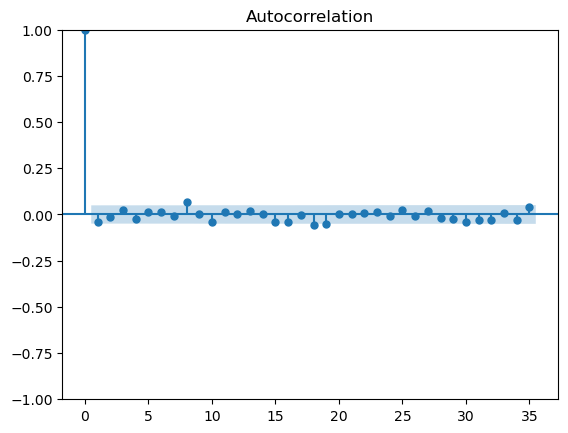

In [129]:
plot_acf(model.resid, lags = 35);

In [132]:
kpss(ts, "ct")

C:\Users\yildirim.akbal\AppData\Local\Temp\ipykernel_17760\3904239542.py:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss(ts, "ct")


(0.5761628278322651,
 0.01,
 23,
 {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216})

In [161]:
L = [1,8,24]
mod = ARIMA(ts, order = (25,1,2), seasonal_order=(0,0,0,8), enforce_stationarity=False, trend = "t")
with mod.fix_params({f"ar.L{i}":0 for i in range(1,24) if i not in L}):
    model = mod.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1568
Model:                ARIMA(25, 1, 2)   Log Likelihood               -6479.888
Date:                Thu, 23 May 2024   AIC                          12975.775
Time:                        19:04:58   BIC                          13018.502
Sample:                             0   HQIC                         12991.671
                               - 1568                                         
Covariance Type:                  opg                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
x1                 0.0713      0.026      2.736      0.006       0.020       0.122
ar.L1              0.7433      0.028     26.308      0.000       0.688       0.799
ar.L2 (fixed)           0        nan        nan        nan         nan         nan
ar.L3 (fixed)           0        nan        nan        nan         nan         nan
ar.L4 (fixed)           0        nan        nan        nan         nan         nan
ar.L5 (fixed)           0        nan        nan        nan         nan         nan
ar.L6 (fixed)           0        nan        nan        nan         nan         nan
ar.L7 (fixed)           0        nan        nan        nan         nan         nan
ar.L8              0.0537      0.017      3.089      0.002       0.020       0.088
ar.L9 (fixed)           0        nan        nan        nan         nan         nan
ar.L10 (fixed)          0        nan        nan        nan         nan         nan
ar.L11 (fixed)          0        nan        nan        nan         nan         nan
ar.L12 (fixed)          0        nan        nan        nan         nan         nan
ar.L13 (fixed)          0        nan        nan        nan         nan         nan
ar.L14 (fixed)          0        nan        nan        nan         nan         nan
ar.L15 (fixed)          0        nan        nan        nan         nan         nan
ar.L16 (fixed)          0        nan        nan        nan         nan         nan
ar.L17 (fixed)          0        nan        nan        nan         nan         nan
ar.L18 (fixed)          0        nan        nan        nan         nan         nan
ar.L19 (fixed)          0        nan        nan        nan         nan         nan
ar.L20 (fixed)          0        nan        nan        nan         nan         nan
ar.L21 (fixed)          0        nan        nan        nan         nan         nan
ar.L22 (fixed)          0        nan        nan        nan         nan         nan
ar.L23 (fixed)          0        nan        nan        nan         nan         nan
ar.L24             0.0815      0.020      4.064      0.000       0.042       0.121
ar.L25            -0.0791      0.020     -3.912      0.000      -0.119      -0.039
ma.L1             -1.3084      0.041    -31.996      0.000      -1.389      -1.228
ma.L2              0.3197      0.038      8.358      0.000       0.245       0.395
sigma2           260.8971      7.974     32.718      0.000     245.268     276.526
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                67.20
Prob(Q):                              0.89   Prob(JB):                         0.00
Heteroskedasticity (H):               0.56   Skew:                            -0.06
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients 

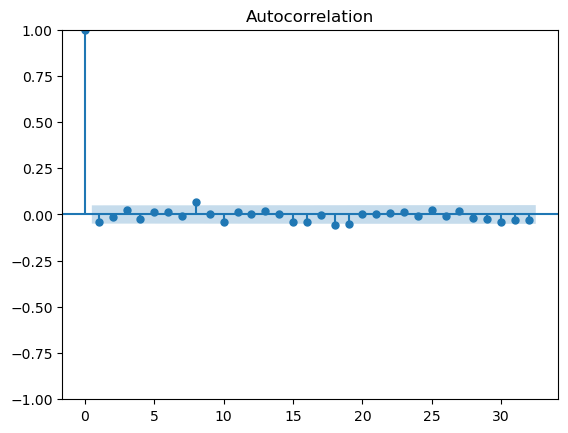

In [162]:
plot_acf(model.resid);

In [163]:
acorr_ljungbox(model.resid, lags = 25, model_df = 5)

,lb_stat,lb_pvalue
1,2.425583,NaN
2,2.694613,NaN
3,3.486815,NaN
4,4.269786,NaN
5,4.459576,NaN
6,4.797311,0.028504
7,4.880423,0.087142
8,12.639280,0.005485
9,12.655911,0.013085
10,15.101891,0.009936


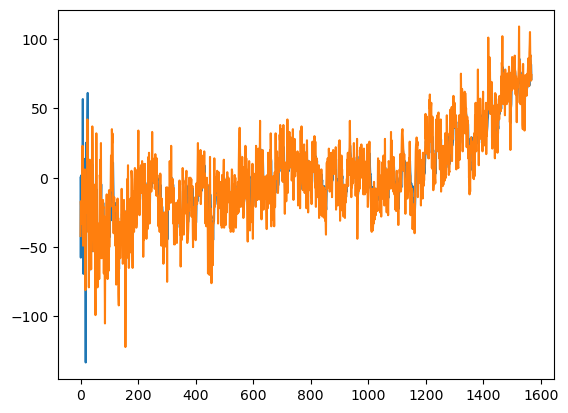

In [164]:
plt.plot(model.predict())
plt.plot(ts)